In [1]:
#Data from /global/cscratch1/sd/schenke/jpsi_pA
#for standard runs do postprocess_jpsi_NERSC.sh
#which will generate yhJPsi.dat and ygJPsi.dat that need to be copied to ~/projects/pAJPsi/JPsi/cori with the appropriate name change for the run
#for rapidity dependent runs do the same with the the modified postprocess_jpsi_NERSC.sh in those folders, 
#then after copying, locally in ~/projects/pAJPsi/JPsi do rapdep.py (change file and folder name in that file, folder needs to be gener)
#for pT spectra, do ./average.awk 

%matplotlib notebook
import numpy as np
from numpy import *
from glob import glob
import h5py
import shutil
import os
import sys
from matplotlib.patches import Rectangle
from os import path, mkdir
home = path.expanduser("~")
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('/Users/schenke/projects/CYM/RpA/csplotstyle'))
sys.path.append(os.path.abspath("/Users/schenke/projects/SAHARAMINIMAL/plots/"))
working_path = path.abspath('/Users/schenke/projects/SAHARAMINIMAL/plots/')
width = 0.5
plotMarkerSize = 8
left = .04
bottom = .05
right = 0.97
top = 0.95
import sys
sys.path.insert(
    0, path.join(home, '/Users/schenke/projects/HYDRO/paper/2019/all_systems/pythonPlotUtilities'))
from CSplottools import getPlotElements, plotDataWithBandErrors, plotDataWithBoxErrors,plotDataWithBoxErrorsWithXwidth

from matplotlib.ticker import NullFormatter


width = 0.5
plotMarkerSize = 8
left = .03
bottom = .05
right = 0.97
top = 0.95

In [2]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (0, 0.1, 0.8), (0, 0.5, 0.6),(0.1,0.7,0.5),(0.5,0.9,0.4),(0.9,0.8,0),(0.9,0.44,0),(0.93,0,0),(0.5,0,0)]  # R -> G -> B
n_bins = 1000  # Discretizes the interpolation into bins
cmap_name = 'my_list'

<IPython.core.display.Javascript object>


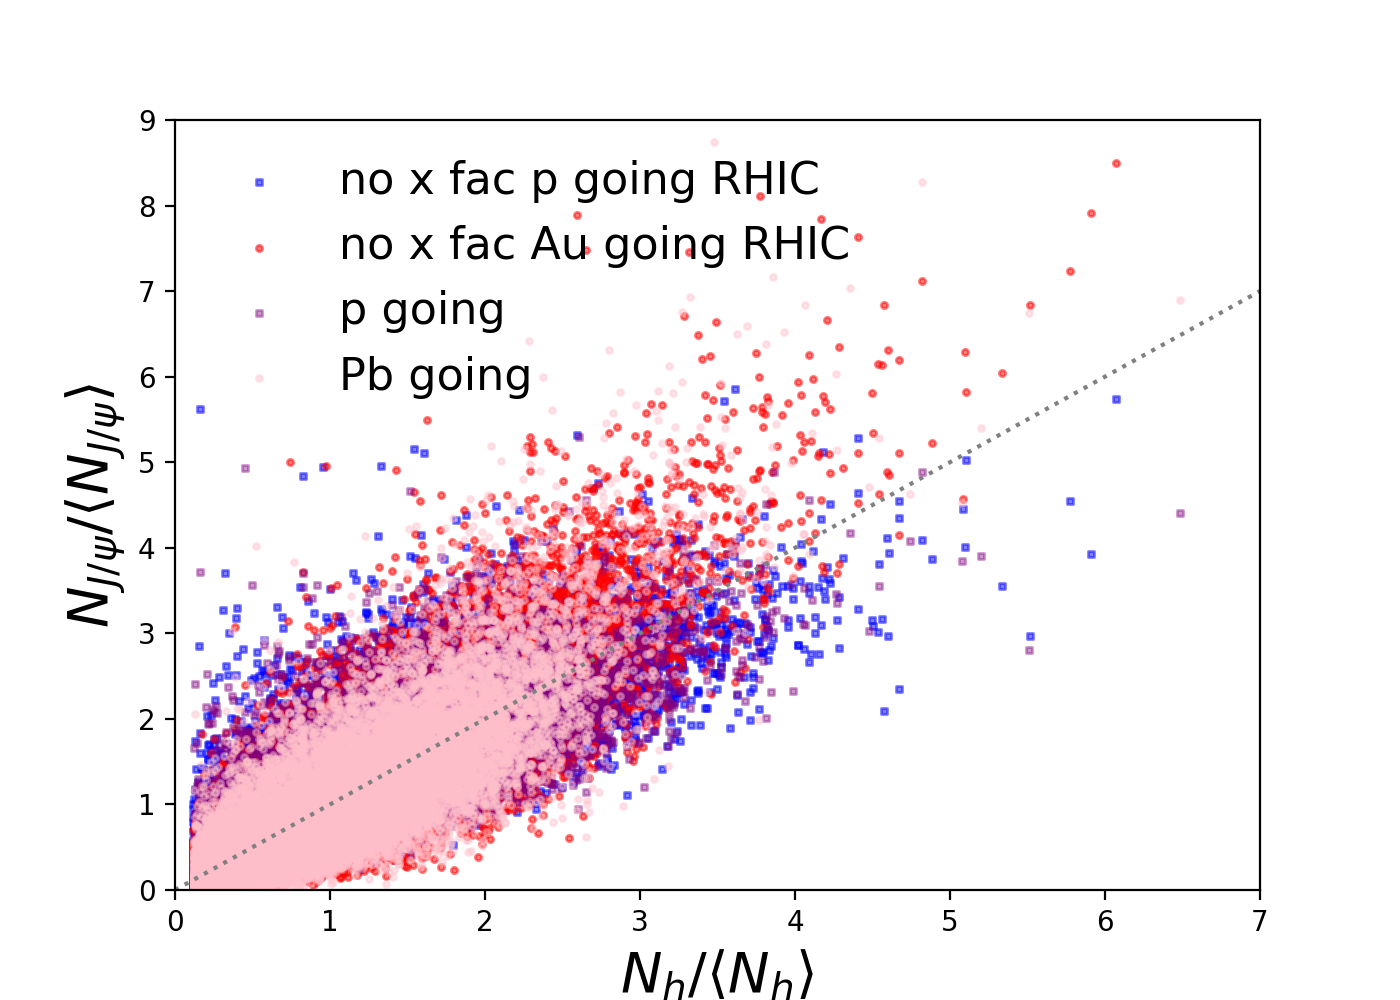

<Nh1>  =  4.1620461535294115  <Nh2>  =  4.418216377818628  <NJPsiY11>  =  81.20621475512647  <NJPsiY12>  =  266.2232312324857  <NJPsiY21>  =  0.3340033882014983  <NJPsiY22>  =  317.85607260550347
<Nh1>  =  19.893951053965374  <Nh2>  =  19.706699154117647  <NJPsiY11>  =  841.4126830410958  <NJPsiY12>  =  858.88621655428  <NJPsiY21>  =  990.6138246229203  <NJPsiY22>  =  1141.5376826540153
<Nh1>  =  4.245801339068627  <Nh2>  =  5.057628257696078  <NJPsiY11>  =  164.04105432285363  <NJPsiY12>  =  273.75667178260176  <NJPsiY21>  =  115.06335066853862  <NJPsiY22>  =  306.1629655960334
<Nh1>  =  4.119271113627451  <Nh2>  =  4.425050488431372  <NJPsiY11>  =  168.0508045287764  <NJPsiY12>  =  280.01415264503726  <NJPsiY21>  =  118.00222640192624  <NJPsiY22>  =  313.1605945508836
<Nh1>  =  1.4538693465454544  <Nh2>  =  1.6079168504492207  <NJPsiY11>  =  48.449704476240356  <NJPsiY12>  =  75.13200874030875  <NJPsiY21>  =  30.989962243531423  <NJPsiY22>  =  76.47686241919716


In [29]:
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y10.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_h_0.dat","r") as f:
    data_temp = genfromtxt(f)   
    data=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-4mb-alphas018-BqYdepNew.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y10.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_h_0.dat","r") as f:
    data_temp = genfromtxt(f)   
    data4mb=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-nox4fac.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y10.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_h_0.dat","r") as f:
    data_temp = genfromtxt(f)   
    datab=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data2=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-nox4fac.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data2b=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX-y0.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data3=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX-y0-nox4fac.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data3b=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data4=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX-nox4fac.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data4b=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX-y0.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data5=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX-pp.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    datapp=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV-PHENIX-pp-nox4fac.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    datappb=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-gluonIR.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    datagIR=data_temp[:,:]
    


left = .03
bottom = .05
right = 0.97
top = 0.95

fig2b = plt.figure()
fig2b.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,7)
ax.set_ylabel(r'$N_{J/\psi}/\langle N_{J/\psi}\rangle$', fontsize = 20)
ind = np.arange(5)
ax.set_xlabel(r'$N_h/\langle N_h\rangle$', fontsize = 20)
x = np.linspace(0,10,100)
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")


ax.scatter(data2b[:,0]/mean(data2b[:,0]), data2b[:,2]/mean(data2b[:,2]), alpha=0.5, c='b', label=r'no x fac p going RHIC',marker='s',s=5)
ax.scatter(data2b[:,0]/mean(data2b[:,0]), data2b[:,4]/mean(data2b[:,4]), alpha=0.5, c='r', label=r'no x fac Au going RHIC',marker='o',s=5)
#ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.4, c='purple', label=r'p going LHC',marker='s',s=5)
#ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.4, c='pink', label=r'Pb going LHC',marker='o',s=5)


# ax.scatter(datapp[:,0]/mean(datapp[:,0]), datapp[:,2]/mean(datapp[:,2]), alpha=0.4, c='g', label=r'pp pos',marker='s',s=5)
# ax.scatter(datapp[:,0]/mean(datapp[:,0]), datapp[:,4]/mean(datapp[:,4]), alpha=0.4, c='y', label=r'pp neg',marker='o',s=5)

ax.scatter(data2[:,0]/mean(data2[:,0]), data2[:,2]/mean(data2[:,2]), alpha=0.4, c='purple', label=r'p going ',marker='s',s=5)
ax.scatter(data2[:,0]/mean(data2[:,0]), data2[:,4]/mean(data2[:,4]), alpha=0.4, c='pink', label=r'Pb going ',marker='o',s=5)


#print("<NJPsi> Pb going = ",mean(data[:,4]))

print("<Nh1>  = ",mean(data2[:,0]), " <Nh2>  = ",mean(data2b[:,0]), " <NJPsiY11>  = ", mean(data2[:,2])*2161*1000, " <NJPsiY12>  = ", mean(data2b[:,2])*2161*1000 , " <NJPsiY21>  = ", mean(data2[:,4])*2161*1000, " <NJPsiY22>  = ", mean(data2b[:,4])*2161*1000)
print("<Nh1>  = ",mean(data[:,0]), " <Nh2>  = ",mean(datab[:,0]), " <NJPsiY11>  = ", mean(data[:,2])*2161*1000, " <NJPsiY12>  = ", mean(datab[:,2])*2161*1000 , " <NJPsiY21>  = ", mean(data[:,4])*2161*1000, " <NJPsiY22>  = ", mean(datab[:,4])*2161*1000)
print("<Nh1>  = ",mean(data4[:,0]), " <Nh2>  = ",mean(data4b[:,0]), " <NJPsiY11>  = ", mean(data4[:,2])*2161*1000, " <NJPsiY12>  = ", mean(data4b[:,2])*2161*1000 , " <NJPsiY21>  = ", mean(data4[:,4])*2161*1000, " <NJPsiY22>  = ", mean(data4b[:,4])*2161*1000)
print("<Nh1>  = ",mean(data3[:,0]), " <Nh2>  = ",mean(data3b[:,0]), " <NJPsiY11>  = ", mean(data3[:,2])*2161*1000, " <NJPsiY12>  = ", mean(data3b[:,2])*2161*1000 , " <NJPsiY21>  = ", mean(data3[:,4])*2161*1000, " <NJPsiY22>  = ", mean(data3b[:,4])*2161*1000)
print("<Nh1>  = ",mean(datapp[:,0]), " <Nh2>  = ",mean(datappb[:,0]), " <NJPsiY11>  = ", mean(datapp[:,2])*2161*1000, " <NJPsiY12>  = ", mean(datappb[:,2])*2161*1000 , " <NJPsiY21>  = ", mean(datapp[:,4])*2161*1000, " <NJPsiY22>  = ", mean(datappb[:,4])*2161*1000)





#ax.axhline(y=0, linewidth=1, color='black', linestyle=':')
ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
# plt.tight_layout()
# ax.text(right, bottom, 'p+Pb 8.16 TeV',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax.transAxes, fontsize = 20)

# ax.text(/
right, bottom, 'a)',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax.transAxes, fontsize = 20)



#plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/scatter.pdf')
plt.show()

<IPython.core.display.Javascript object>


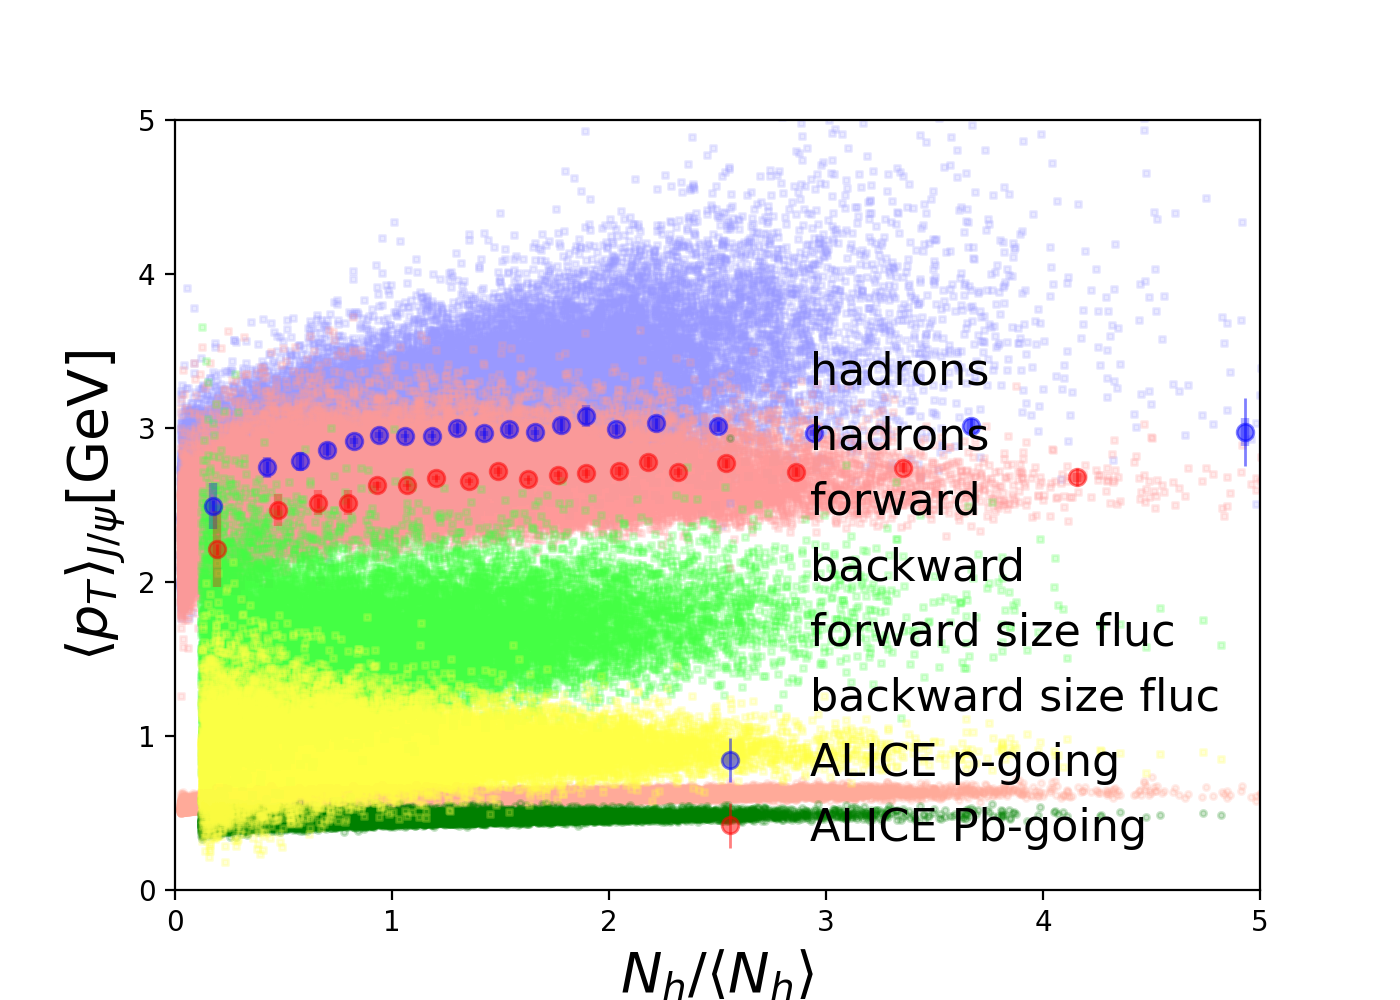

<NJPsi> Pb going =  0.0004584052867297179
19.893951053965374   4.1620461535294115   0.00038936264832998413   3.75780725382353e-05


In [4]:

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_JPsi_meanpt_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]
    
    
with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_JPsi_meanpt_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_pPb_5020GeV_meanpT_1307.1094.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICE=data_temp[:,:]
    
    
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2b = plt.figure()
fig2b.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,5)
ax.set_xlim(0,5)
ax.set_ylabel(r'$\langle p_T\rangle_{J/\psi} [{\rm GeV}]$', fontsize = 20)
ind = np.arange(5)
ax.set_xlabel(r'$N_h/\langle N_h\rangle$', fontsize = 20)
x = np.linspace(0,10,100)
#ax.plot(x, x, '-r', color='gray', label='', linestyle=":")
ax.scatter(data[:,0]/mean(data[:,0]), data[:,6], alpha=0.2, c='#FFAA99', label=r'hadrons',marker='o',s=5)
ax.scatter(data2[:,0]/mean(data2[:,0]), data2[:,6], alpha=0.2, c='g', label=r'hadrons',marker='o',s=5)

ax.scatter(data[:,0]/mean(data[:,0]), data[:,7], alpha=0.2, c='#9999FF', label=r'forward',marker='s',s=5)
ax.scatter(data[:,0]/mean(data[:,0]), data[:,8], alpha=0.2, c='#FF9999', label=r'backward',marker='s',s=5)

ax.scatter(data2[:,0]/mean(data2[:,0]), data2[:,7], alpha=0.2, c='#44FF44', label=r'forward size fluc',marker='s',s=5)
ax.scatter(data2[:,0]/mean(data2[:,0]), data2[:,8], alpha=0.2, c='#FFFF44', label=r'backward size fluc',marker='s',s=5)


ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='b', label=r'ALICE p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='b', label=r'',marker='', linestyle='', linewidth=3)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='r', label=r'ALICE Pb-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='r', label=r'',marker='', linestyle='', linewidth=3)


print("<NJPsi> Pb going = ",mean(data[:,4]))

print(mean(data[:,0]), " ",mean(data2[:,0]), " ", mean(data[:,2]), " ", mean(data2[:,2]))

#ax.axhline(y=0, linewidth=1, color='black', linestyle=':')
ax.legend(loc=4, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
# plt.tight_layout()
# ax.text(right, bottom, 'p+Pb 8.16 TeV',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax.transAxes, fontsize = 20)

# ax.text(/
right, bottom, 'a)',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax.transAxes, fontsize = 20)


plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/scatterpT.pdf')
with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_pPb_5020GeV_meanpT_1307.1094.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICE=data_temp[:,:]
    
plt.show()

<IPython.core.display.Javascript object>


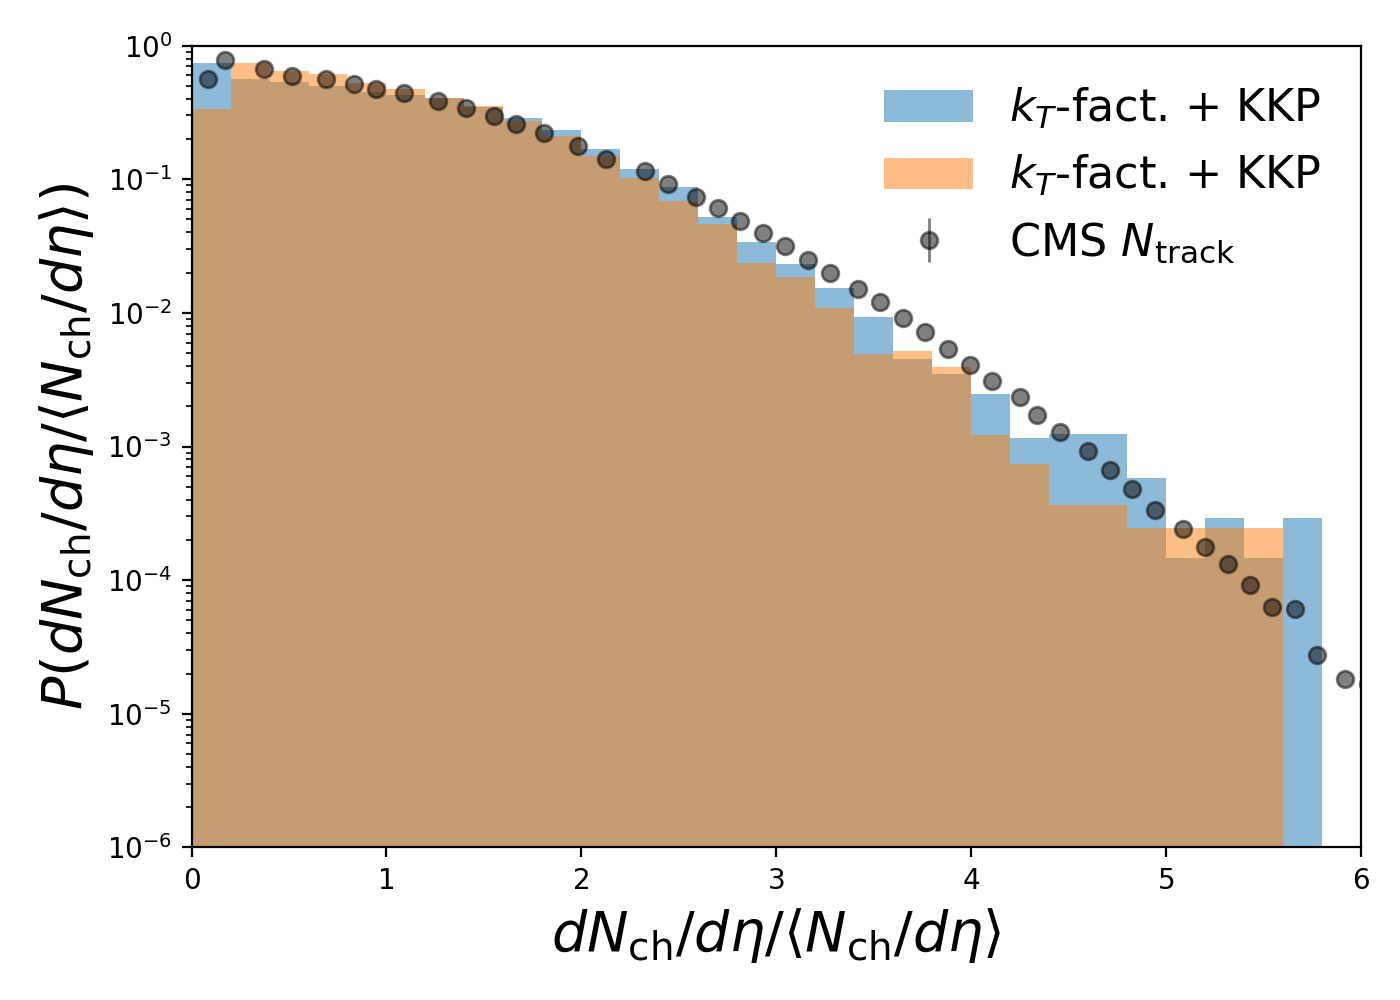

In [5]:
with open("/Users/schenke/projects/pAJPsi/JPsi/plots/cms-pPb-NtrackDist.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataCMS=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-5020GeV.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data7=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-5020GeV-Y0.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data72=data_temp[:,:]
    
with open("/Users/schenke/projects/pAJPsi/JPsi/cori/yhJPsi-w01-Bqw07-Bp3-Bq1-m02-Nq3-13mb-alphas018-BqYdepNew-200GeV.dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/cori/outputBig_y105dat","r") as f:
#with open("/Users/schenke/projects/pAJPsi/JPsi/output_0.dat","r") as f:
    data_temp = genfromtxt(f)
    data8=data_temp[:,:]
    
#dataAll=concatenate((data, data2), axis=0)
dataAll=concatenate((data7, data72), axis=0)
    
fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_xlim(0,6)
ax.set_ylim(0.000001,1)
ax.hist(dataAll[:,0]/mean(dataAll[:,0]), bins=[0,0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6,1.8,2.,2.2,2.4,2.6,2.8,3.,3.2,3.4,3.6,3.8,4,4.2,4.4,4.8,5,5.2,5.4,5.6,5.8,6], linewidth=3,log=True, density=True, alpha=0.5, label=r'$k_T$-fact. + KKP', histtype='bar')
ax.hist(data8[:,0]/mean(data8[:,0]), bins=[0,0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6,1.8,2.,2.2,2.4,2.6,2.8,3.,3.2,3.4,3.6,3.8,4,4.2,4.4,4.8,5,5.2,5.4,5.6,5.8,6], linewidth=3,log=True, density=True, alpha=0.5, label=r'$k_T$-fact. + KKP', histtype='bar')
#ax.hist(dataAll[:,0], linewidth=3,log=True, density=True, alpha=0.5, label=r'$k_T$-fact. + KKP', histtype='bar')
#ax.hist(data8[:,0], linewidth=3,log=True, density=True, alpha=0.5, label=r'$k_T$-fact. + KKP', histtype='bar')



#ax.hist(data3[:,0]/mean(data3[:,0]),bins=[0,0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6,1.8,2.,2.2,2.4,2.6,2.8,3.,3.2,3.4,3.6,3.8,4,4.2,4.4,4.8,5,5.2,5.4,5.6,5.8,6], log=True, density=True, alpha=0.6, label=r'1mb')

ax.set_ylabel(r'$P(dN_{\rm ch}/d\eta/\langle N_{\rm ch}/d\eta\rangle)$', fontsize = 20)
ind = np.arange(5)
ax.set_xlabel(r'$dN_{\rm ch}/d\eta/\langle N_{\rm ch}/d\eta\rangle$', fontsize = 20)
ax.errorbar(dataCMS[:,0]/41.937510, dataCMS[:,1]/6863849011.701903*41.937510, yerr=dataCMS[:,2], alpha=0.5, color='black', label=r'CMS $N_{\rm track}$',marker='o', linestyle='', linewidth=1)

ax.legend(loc=1, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)

plt.tight_layout()

plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/MultDist-200GeV.pdf')

#ax.hist(data[:,0])/'
#print((array(data[:,0])))
#print(sort(array(data[:,0])))

<IPython.core.display.Javascript object>


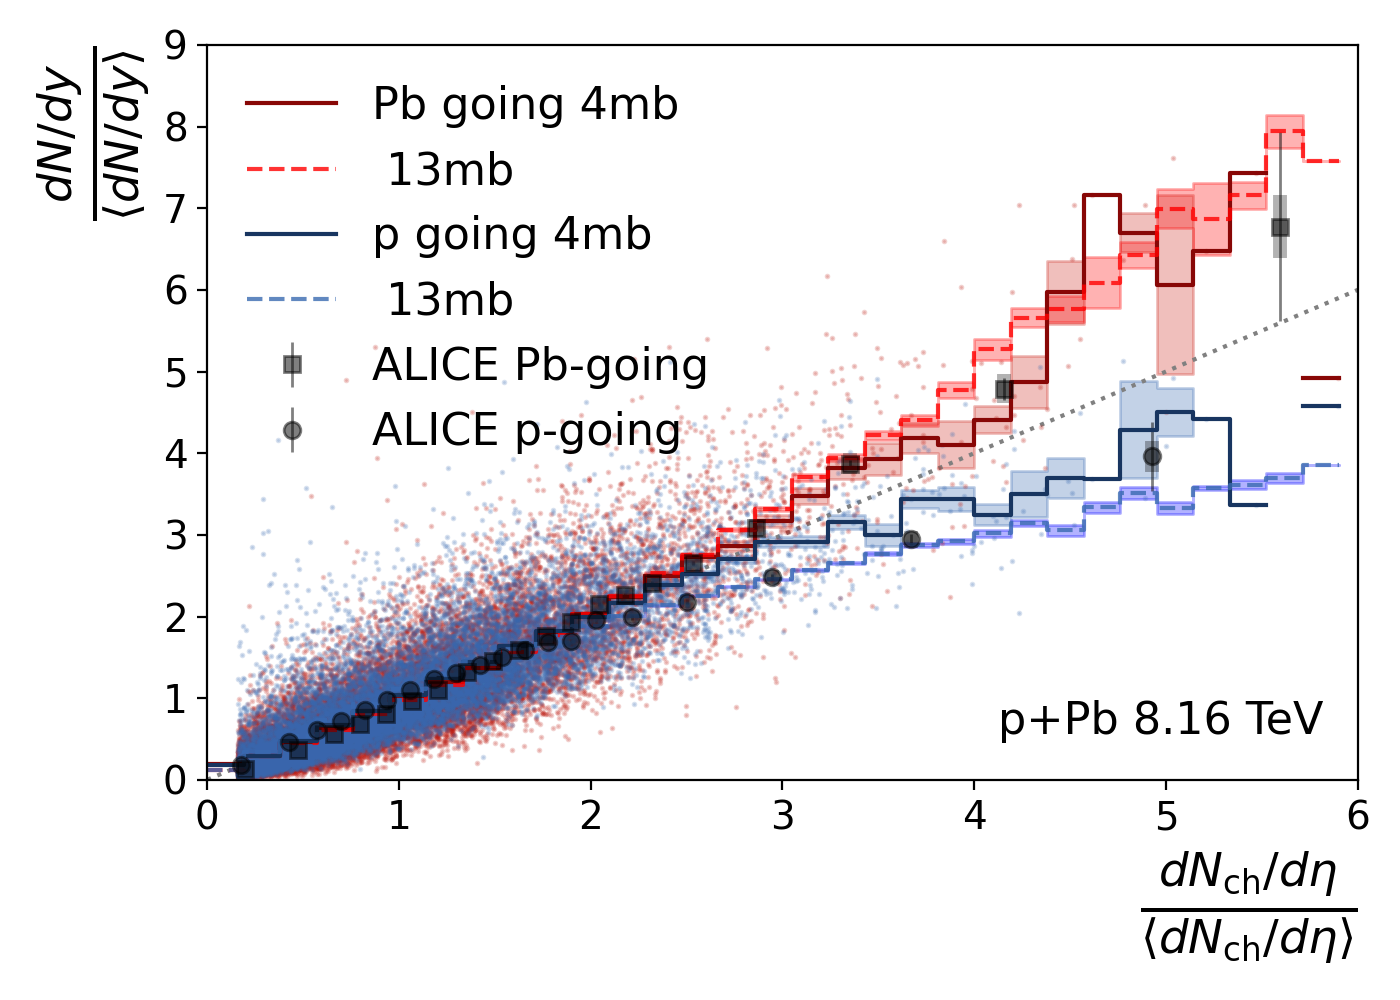

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [34]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,6)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data[:,0]/mean(data[:,0])
jpsip = data[:,2]/mean(data[:,2])
jpsiPb = data[:,4]/mean(data[:,4])

gluons2 = data4mb[:,0]/mean(data4mb[:,0])
jpsip2 = data4mb[:,2]/mean(data4mb[:,2])
jpsiPb2 = data4mb[:,4]/mean(data4mb[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

ax.plot(data4mb[:,0]/mean(data4mb[:,0]), data4mb[:,4]/mean(data4mb[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
ax.plot(data4mb[:,0]/mean(data4mb[:,0]), data4mb[:,2]/mean(data4mb[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)



ax.step(bins, bin_meansb2, alpha=1, color='#880706', label=r'Pb going 4mb ',marker='', where='pre')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_means2, alpha=0.8, color='r', label=r' 13mb',marker='', linestyle='--')
ax.fill_between(bins, bin_means2-bin_error2, bin_means2+bin_error2, step='pre', alpha=0.3, color='r')
ax.step(bins, bin_meansb, alpha=1, color='#183560', label=r'p going 4mb',marker='', where='pre')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='#396AB1')
ax.step(bins, bin_means, alpha=0.8, color='#396AB1', label=r' 13mb',marker='', linestyle='--')
ax.fill_between(bins, bin_means-bin_error, bin_means+bin_error, step='pre', alpha=0.3, color='b')

ax.text(right, bottom, 'p+Pb 8.16 TeV',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)


ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_4mb.pdf')


<IPython.core.display.Javascript object>


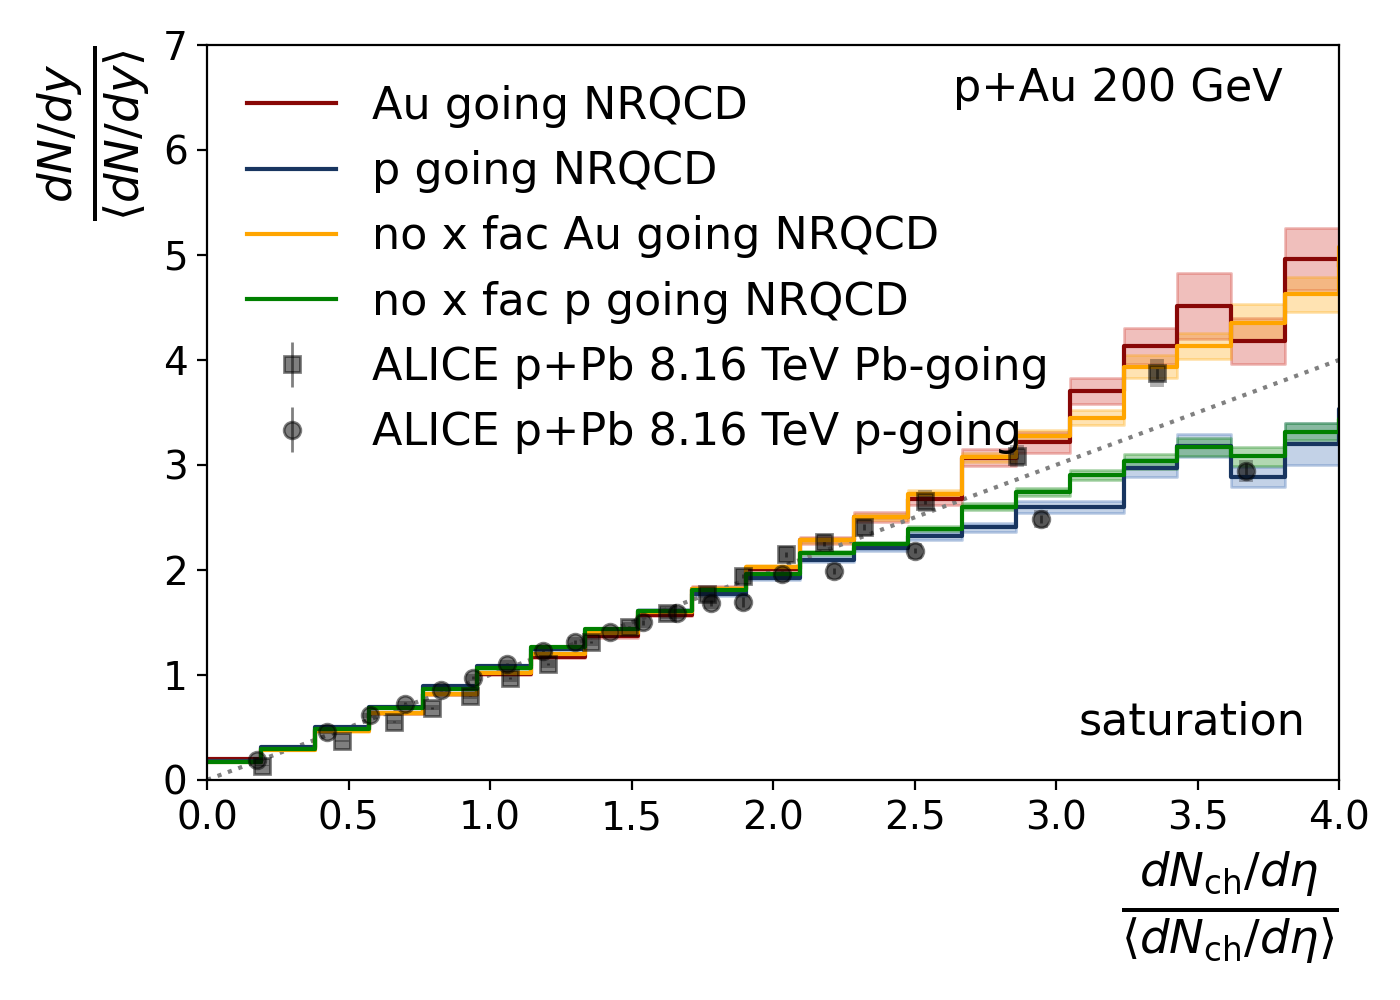

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [12]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,7)
ax.set_xlim(0,4)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data2[:,0]/mean(data2[:,0])
jpsip = data2[:,2]/mean(data2[:,2])
jpsiPb = data2[:,4]/mean(data2[:,4])

gluons2 = data2b[:,0]/mean(data2b[:,0])
jpsip2 = data2b[:,2]/mean(data2b[:,2])
jpsiPb2 = data2b[:,4]/mean(data2b[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,4]/mean(data2b[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,2]/mean(data2b[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)


ax.step(bins, bin_means2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means2-bin_error2, bin_means2+bin_error2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_means, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means-bin_error, bin_means+bin_error, step='pre', alpha=0.3, color='#396AB1')

ax.step(bins, bin_meansb2, alpha=1, color='orange', label=r'no x fac Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='orange')
ax.step(bins, bin_meansb, alpha=1, color='green', label=r'no x fac p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='green')

ax.text(top, right, 'p+Au 200 GeV',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes, fontsize = 16)


ax.text(right, bottom, 'saturation',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
#plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC_nosizefluc.pdf')


<IPython.core.display.Javascript object>


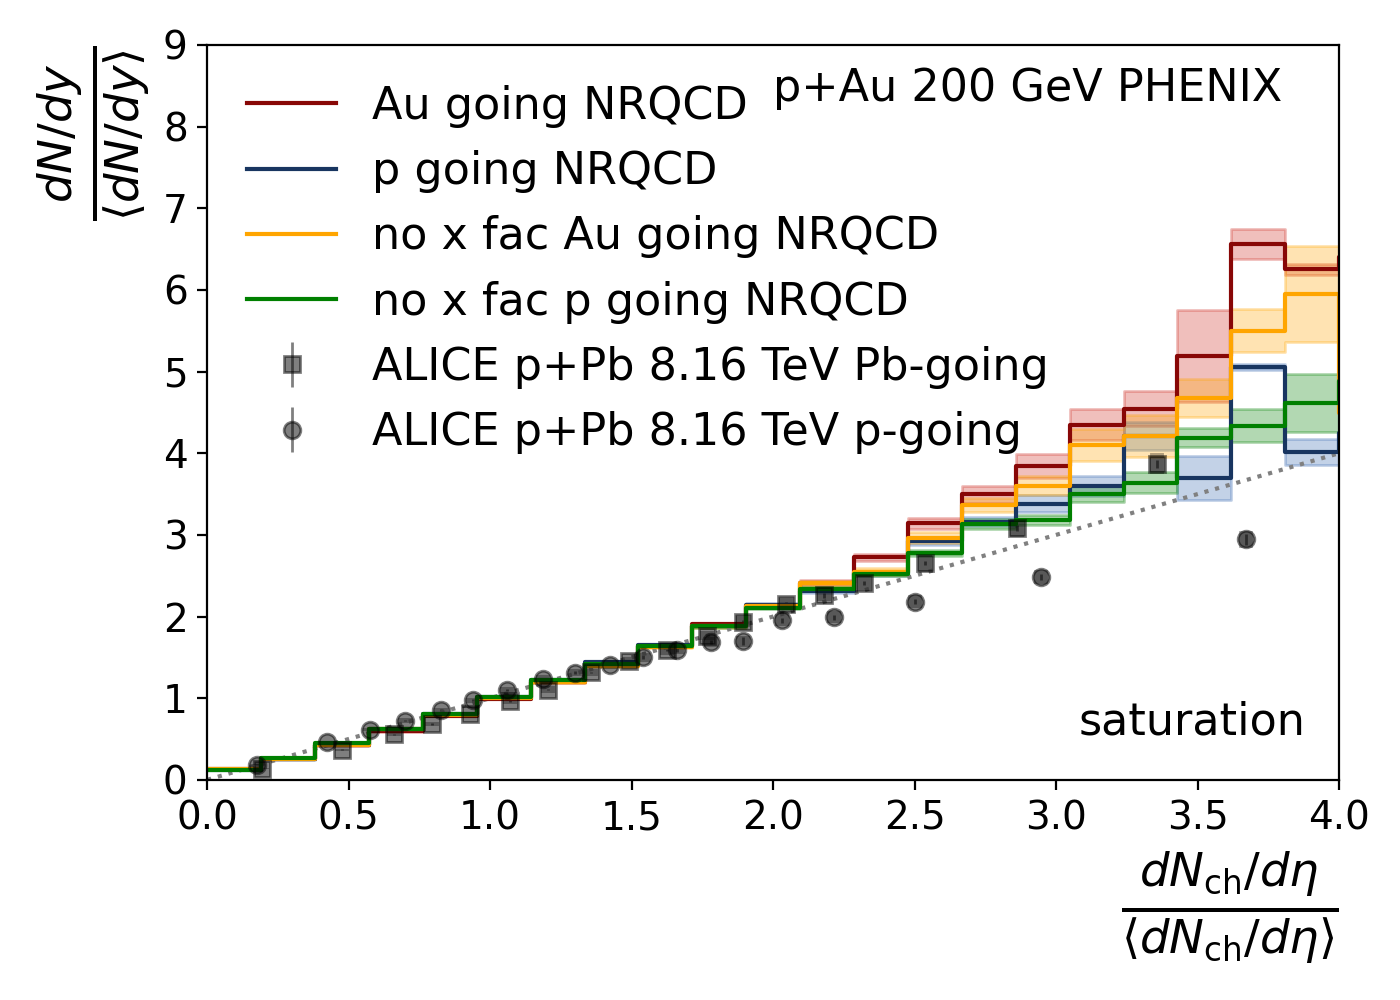

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [19]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,4)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data4[:,0]/mean(data4[:,0])
jpsip = data4[:,2]/mean(data4[:,2])
jpsiPb = data4[:,4]/mean(data4[:,4])

gluons2 = data4b[:,0]/mean(data4b[:,0])
jpsip2 = data4b[:,2]/mean(data4b[:,2])
jpsiPb2 = data4b[:,4]/mean(data4b[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,4]/mean(data2b[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,2]/mean(data2b[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)


ax.step(bins, bin_means2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means2-bin_error2, bin_means2+bin_error2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_means, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means-bin_error, bin_means+bin_error, step='pre', alpha=0.3, color='#396AB1')

ax.step(bins, bin_meansb2, alpha=1, color='orange', label=r'no x fac Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='orange')
ax.step(bins, bin_meansb, alpha=1, color='green', label=r'no x fac p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='green')

ax.text(top, right, 'p+Au 200 GeV PHENIX',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes, fontsize = 16)


ax.text(right, bottom, 'saturation',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
#plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC_nosizefluc.pdf')


<IPython.core.display.Javascript object>


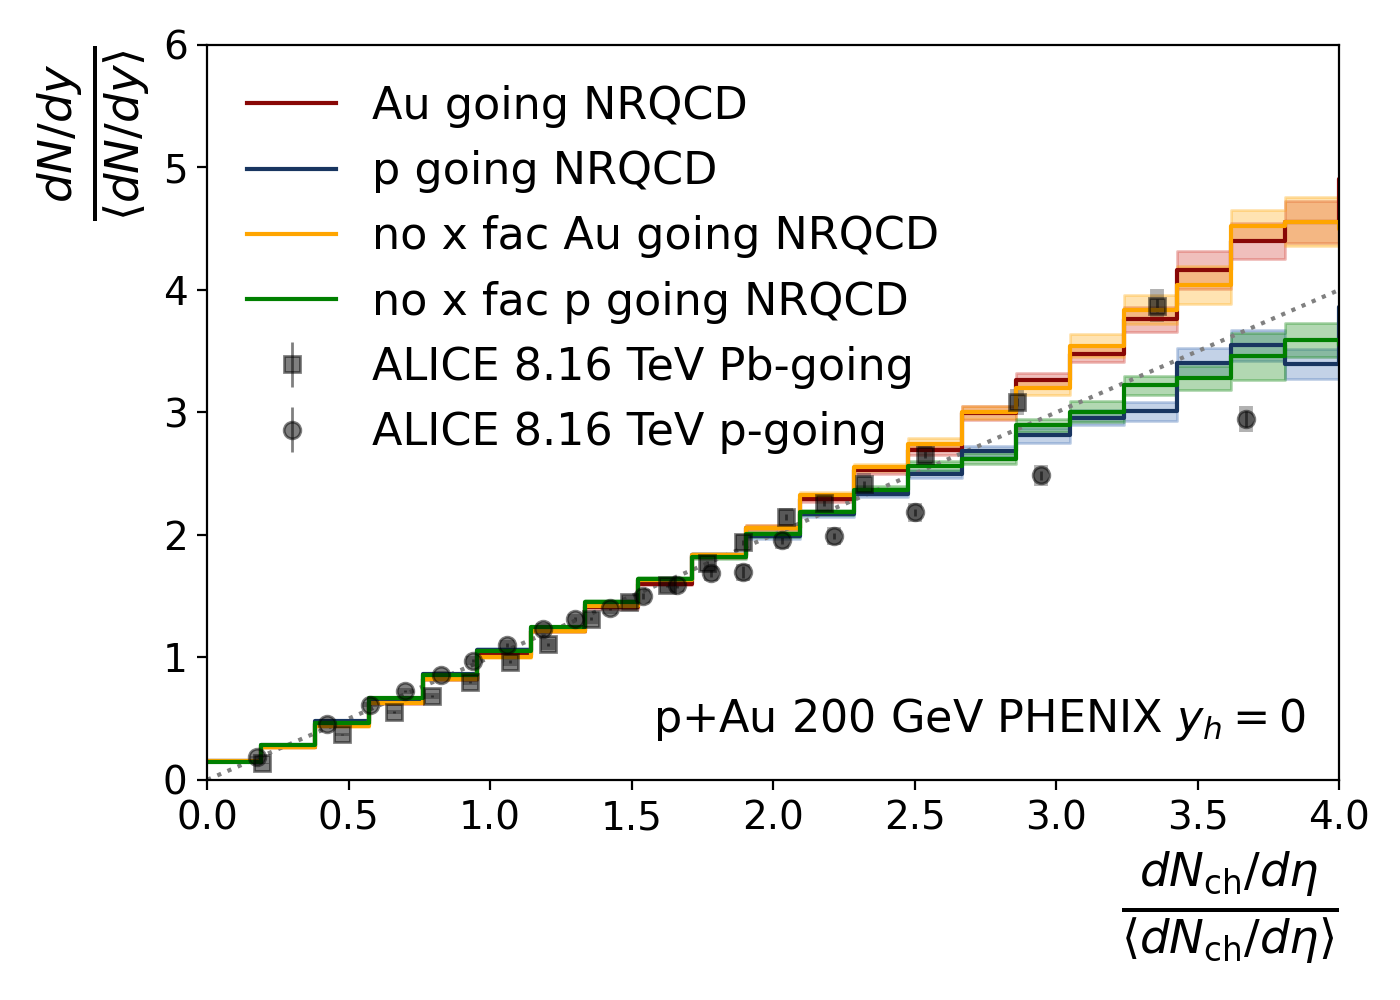

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [27]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,6)
ax.set_xlim(0,4)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data3[:,0]/mean(data3[:,0])
jpsip = data3[:,2]/mean(data3[:,2])
jpsiPb = data3[:,4]/mean(data3[:,4])

gluons2 = data3b[:,0]/mean(data3b[:,0])
jpsip2 = data3b[:,2]/mean(data3b[:,2])
jpsiPb2 = data3b[:,4]/mean(data3b[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,4]/mean(data2b[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,2]/mean(data2b[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)


ax.step(bins, bin_means2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means2-bin_error2, bin_means2+bin_error2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_means, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means-bin_error, bin_means+bin_error, step='pre', alpha=0.3, color='#396AB1')

ax.step(bins, bin_meansb2, alpha=1, color='orange', label=r'no x fac Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='orange')
ax.step(bins, bin_meansb, alpha=1, color='green', label=r'no x fac p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='green')



ax.text(right, bottom, r'p+Au 200 GeV PHENIX $y_h=0$',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
#plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC_nosizefluc.pdf')


<IPython.core.display.Javascript object>


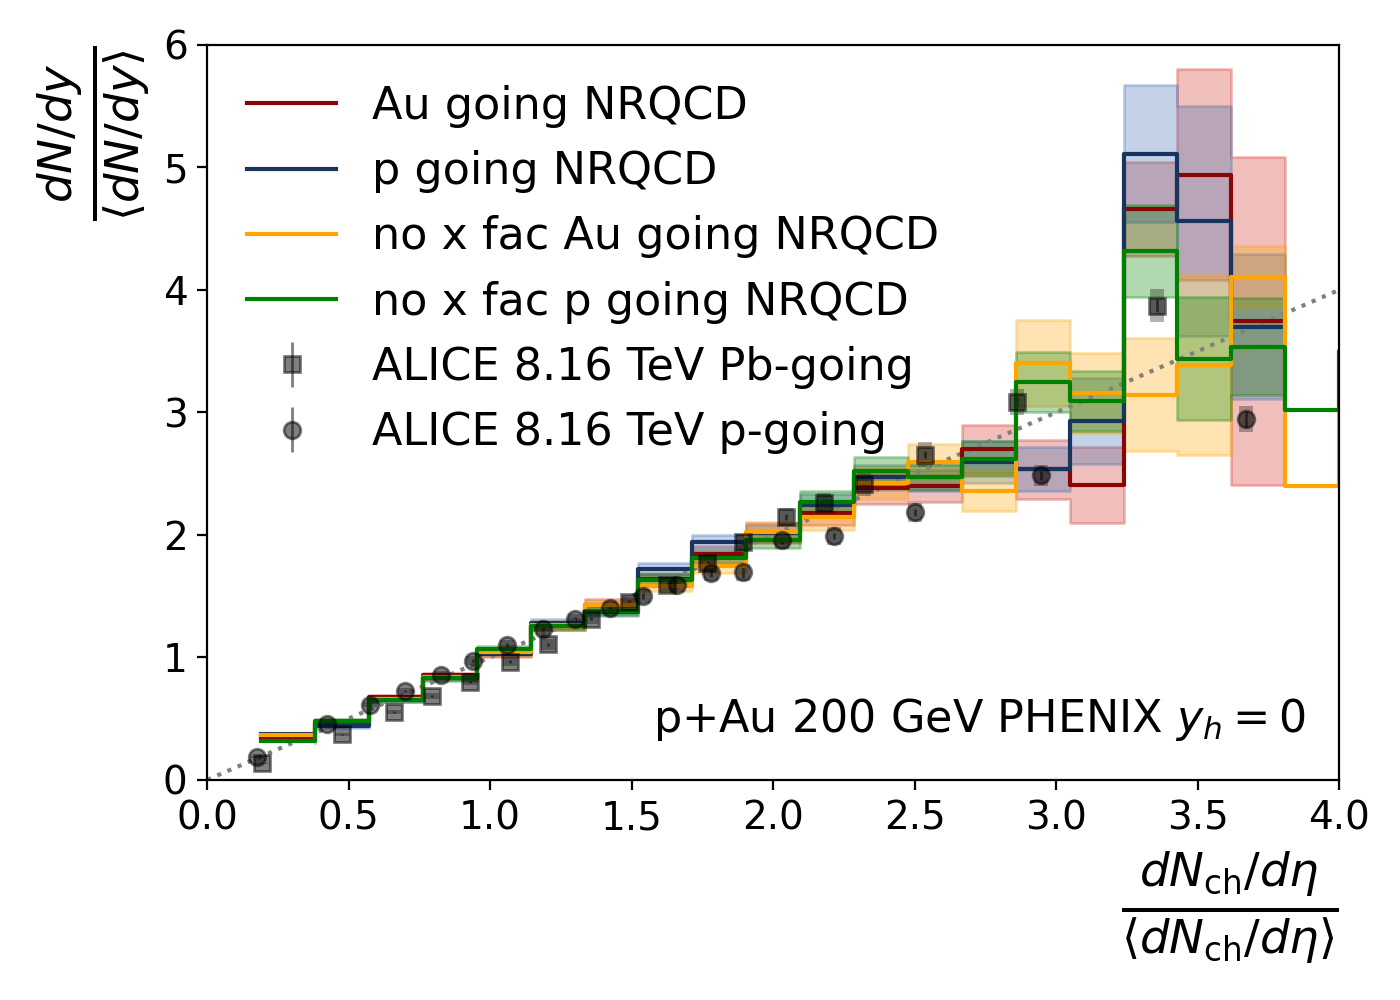

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [30]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,6)
ax.set_xlim(0,4)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = datapp[:,0]/mean(datapp[:,0])
jpsip = datapp[:,2]/mean(datapp[:,2])
jpsiPb = datapp[:,4]/mean(datapp[:,4])

gluons2 = datappb[:,0]/mean(datappb[:,0])
jpsip2 = datappb[:,2]/mean(datappb[:,2])
jpsiPb2 = datappb[:,4]/mean(datappb[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,4]/mean(data2b[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,2]/mean(data2b[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)


ax.step(bins, bin_means2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means2-bin_error2, bin_means2+bin_error2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_means, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means-bin_error, bin_means+bin_error, step='pre', alpha=0.3, color='#396AB1')

ax.step(bins, bin_meansb2, alpha=1, color='orange', label=r'no x fac Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='orange')
ax.step(bins, bin_meansb, alpha=1, color='green', label=r'no x fac p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='green')



ax.text(right, bottom, r'p+Au 200 GeV PHENIX $y_h=0$',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
#plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC_nosizefluc.pdf')


<IPython.core.display.Javascript object>


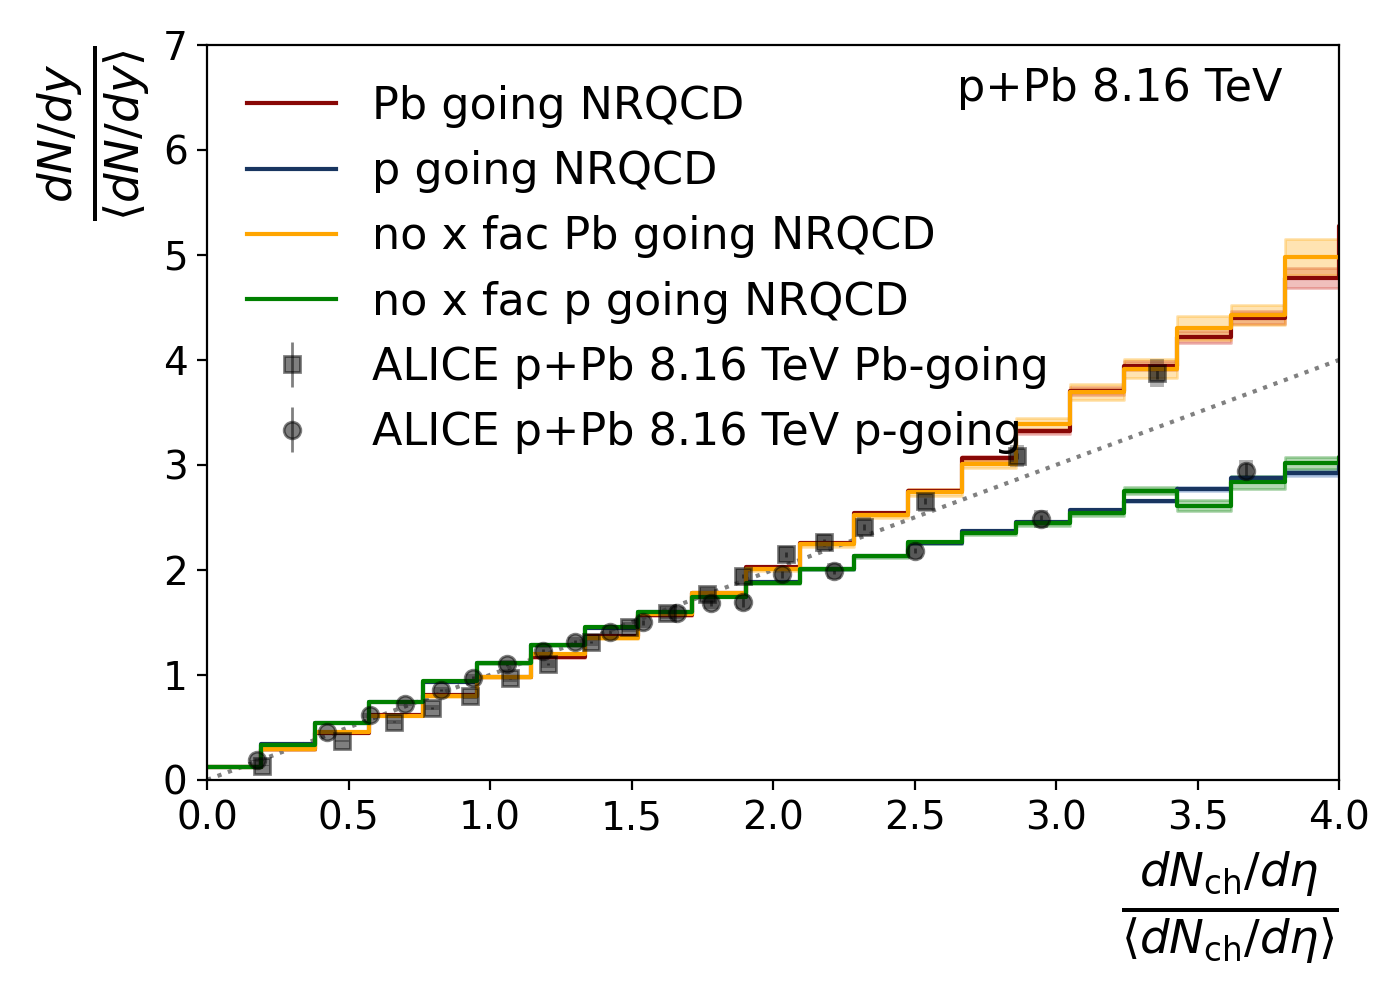

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [15]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,7)
ax.set_xlim(0,4)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data[:,0]/mean(data[:,0])
jpsip = data[:,2]/mean(data[:,2])
jpsiPb = data[:,4]/mean(data[:,4])

gluons2 = datab[:,0]/mean(datab[:,0])
jpsip2 = datab[:,2]/mean(datab[:,2])
jpsiPb2 = datab[:,4]/mean(datab[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,4]/mean(data2b[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
#ax.plot(data2b[:,0]/mean(data2b[:,0]), data2b[:,2]/mean(data2b[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)


ax.step(bins, bin_means2, alpha=1, color='#880706', label=r'Pb going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means2-bin_error2, bin_means2+bin_error2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_means, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_means-bin_error, bin_means+bin_error, step='pre', alpha=0.3, color='#396AB1')

ax.step(bins, bin_meansb2, alpha=1, color='orange', label=r'no x fac Pb going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='orange')
ax.step(bins, bin_meansb, alpha=1, color='green', label=r'no x fac p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='green')

ax.text(top, right, 'p+Pb 8.16 TeV',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes, fontsize = 16)


ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
#plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC_nosizefluc.pdf')


<IPython.core.display.Javascript object>


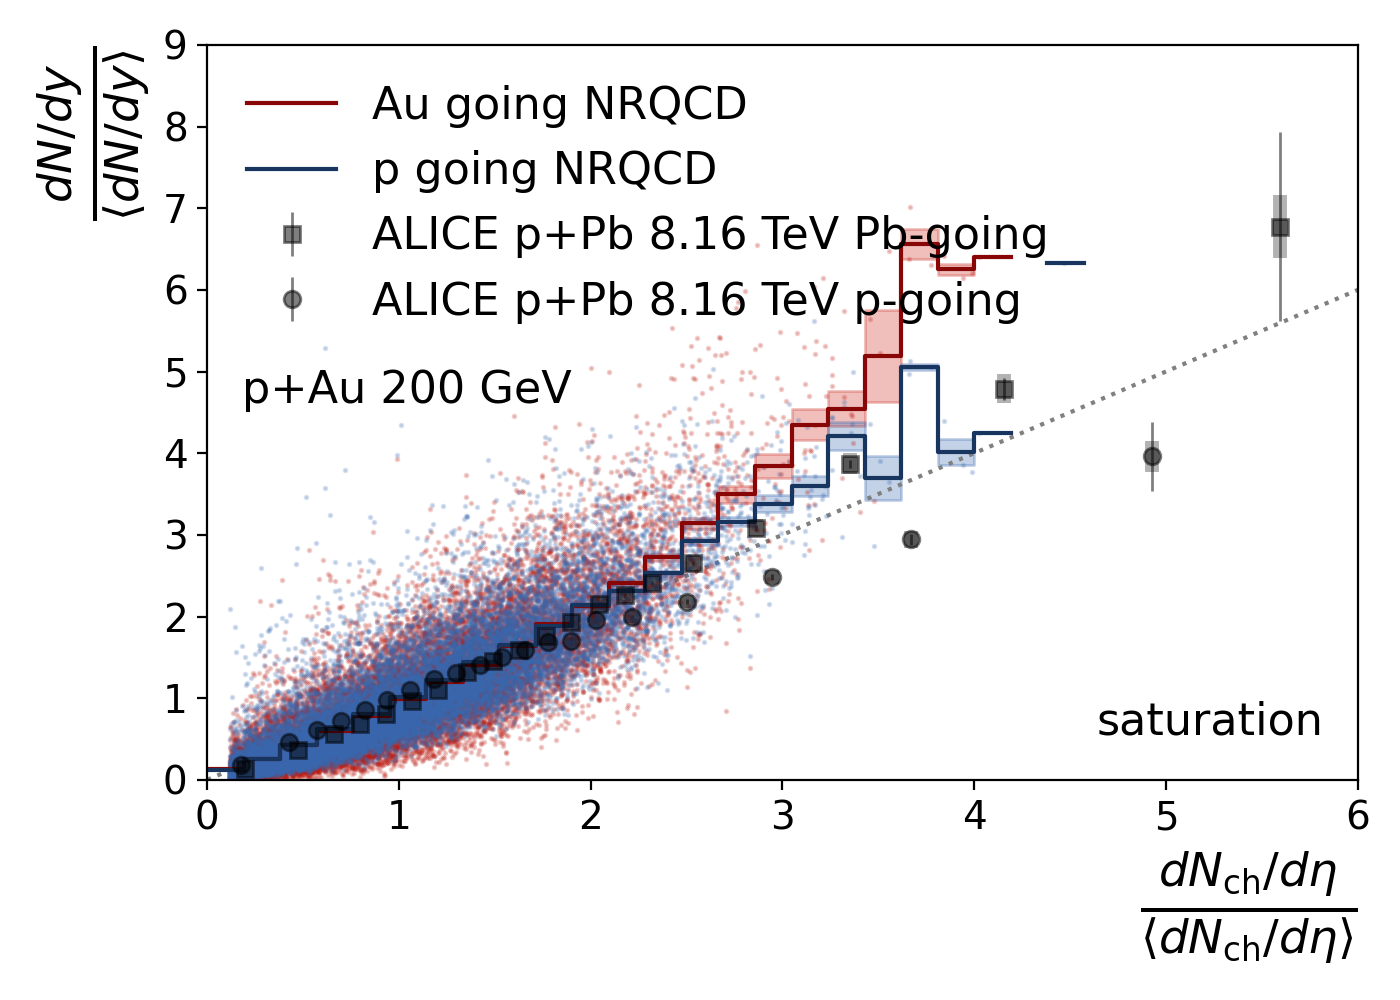

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [8]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,6)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data[:,0]/mean(data[:,0])
jpsip = data[:,2]/mean(data[:,2])
jpsiPb = data[:,4]/mean(data[:,4])

gluons2 = data4[:,0]/mean(data4[:,0])
jpsip2 = data4[:,2]/mean(data4[:,2])
jpsiPb2 = data4[:,4]/mean(data4[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

ax.plot(data4[:,0]/mean(data4[:,0]), data4[:,4]/mean(data4[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
ax.plot(data4[:,0]/mean(data4[:,0]), data4[:,2]/mean(data4[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)



ax.step(bins, bin_meansb2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_meansb, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='#396AB1')


ax.text(left, bottom+0.45, 'p+Au 200 GeV',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)


ax.text(right, bottom, 'saturation',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC.pdf')


<IPython.core.display.Javascript object>


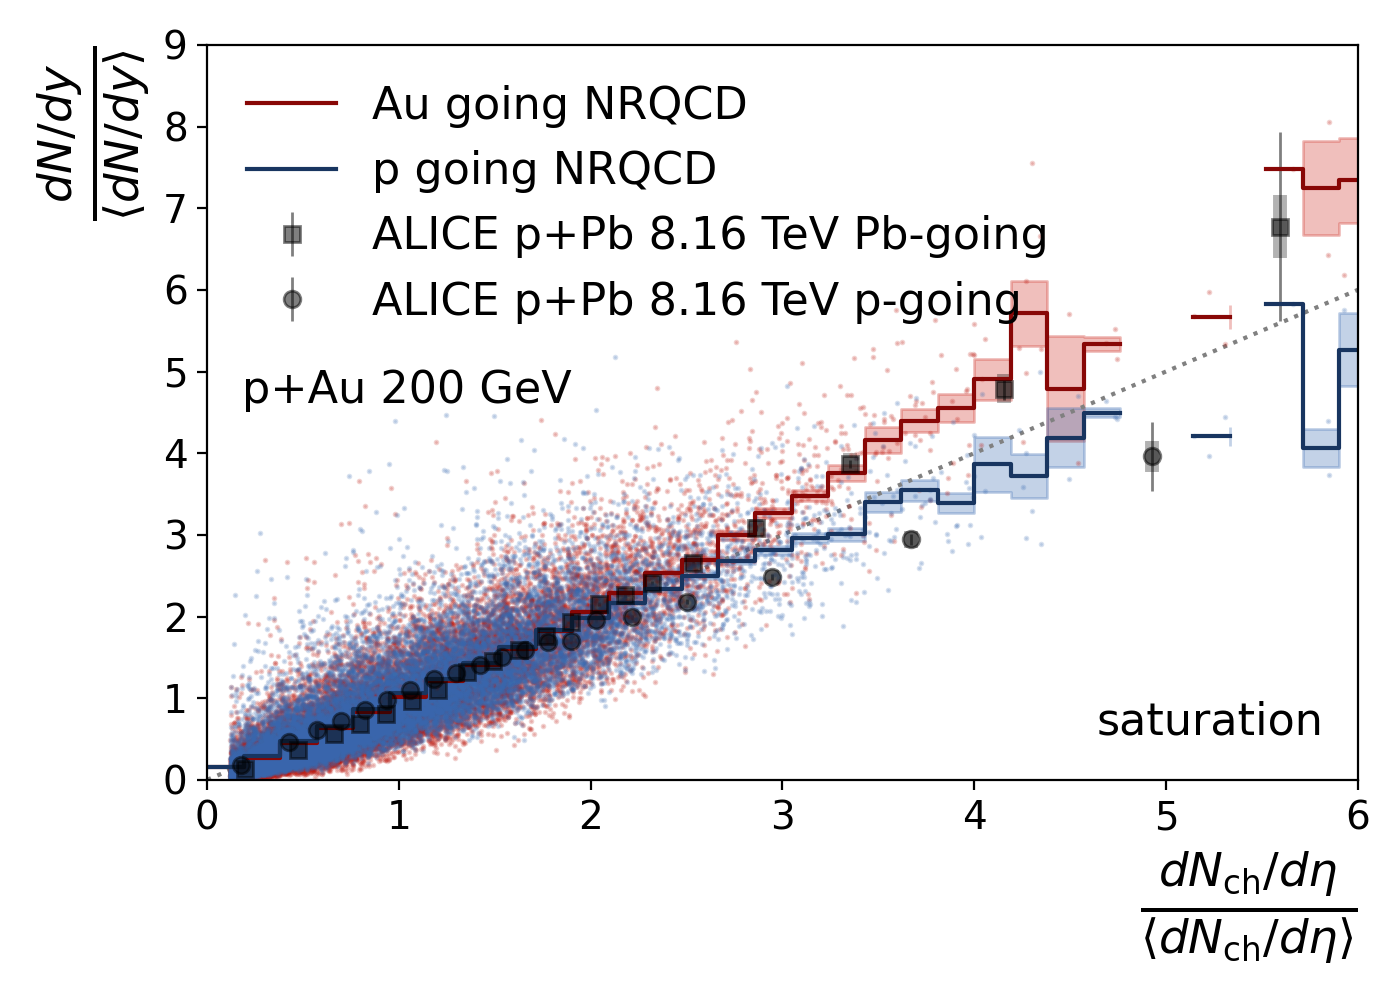

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [20]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,6)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data[:,0]/mean(data[:,0])
jpsip = data[:,2]/mean(data[:,2])
jpsiPb = data[:,4]/mean(data[:,4])

gluons2 = data5[:,0]/mean(data5[:,0])
jpsip2 = data5[:,2]/mean(data5[:,2])
jpsiPb2 = data5[:,4]/mean(data5[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

ax.plot(data5[:,0]/mean(data5[:,0]), data5[:,4]/mean(data5[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
ax.plot(data5[:,0]/mean(data5[:,0]), data5[:,2]/mean(data5[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)



ax.step(bins, bin_meansb2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_meansb, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='#396AB1')


ax.text(left, bottom+0.45, 'p+Au 200 GeV',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)


ax.text(right, bottom, 'saturation',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC-y0.pdf')


<IPython.core.display.Javascript object>


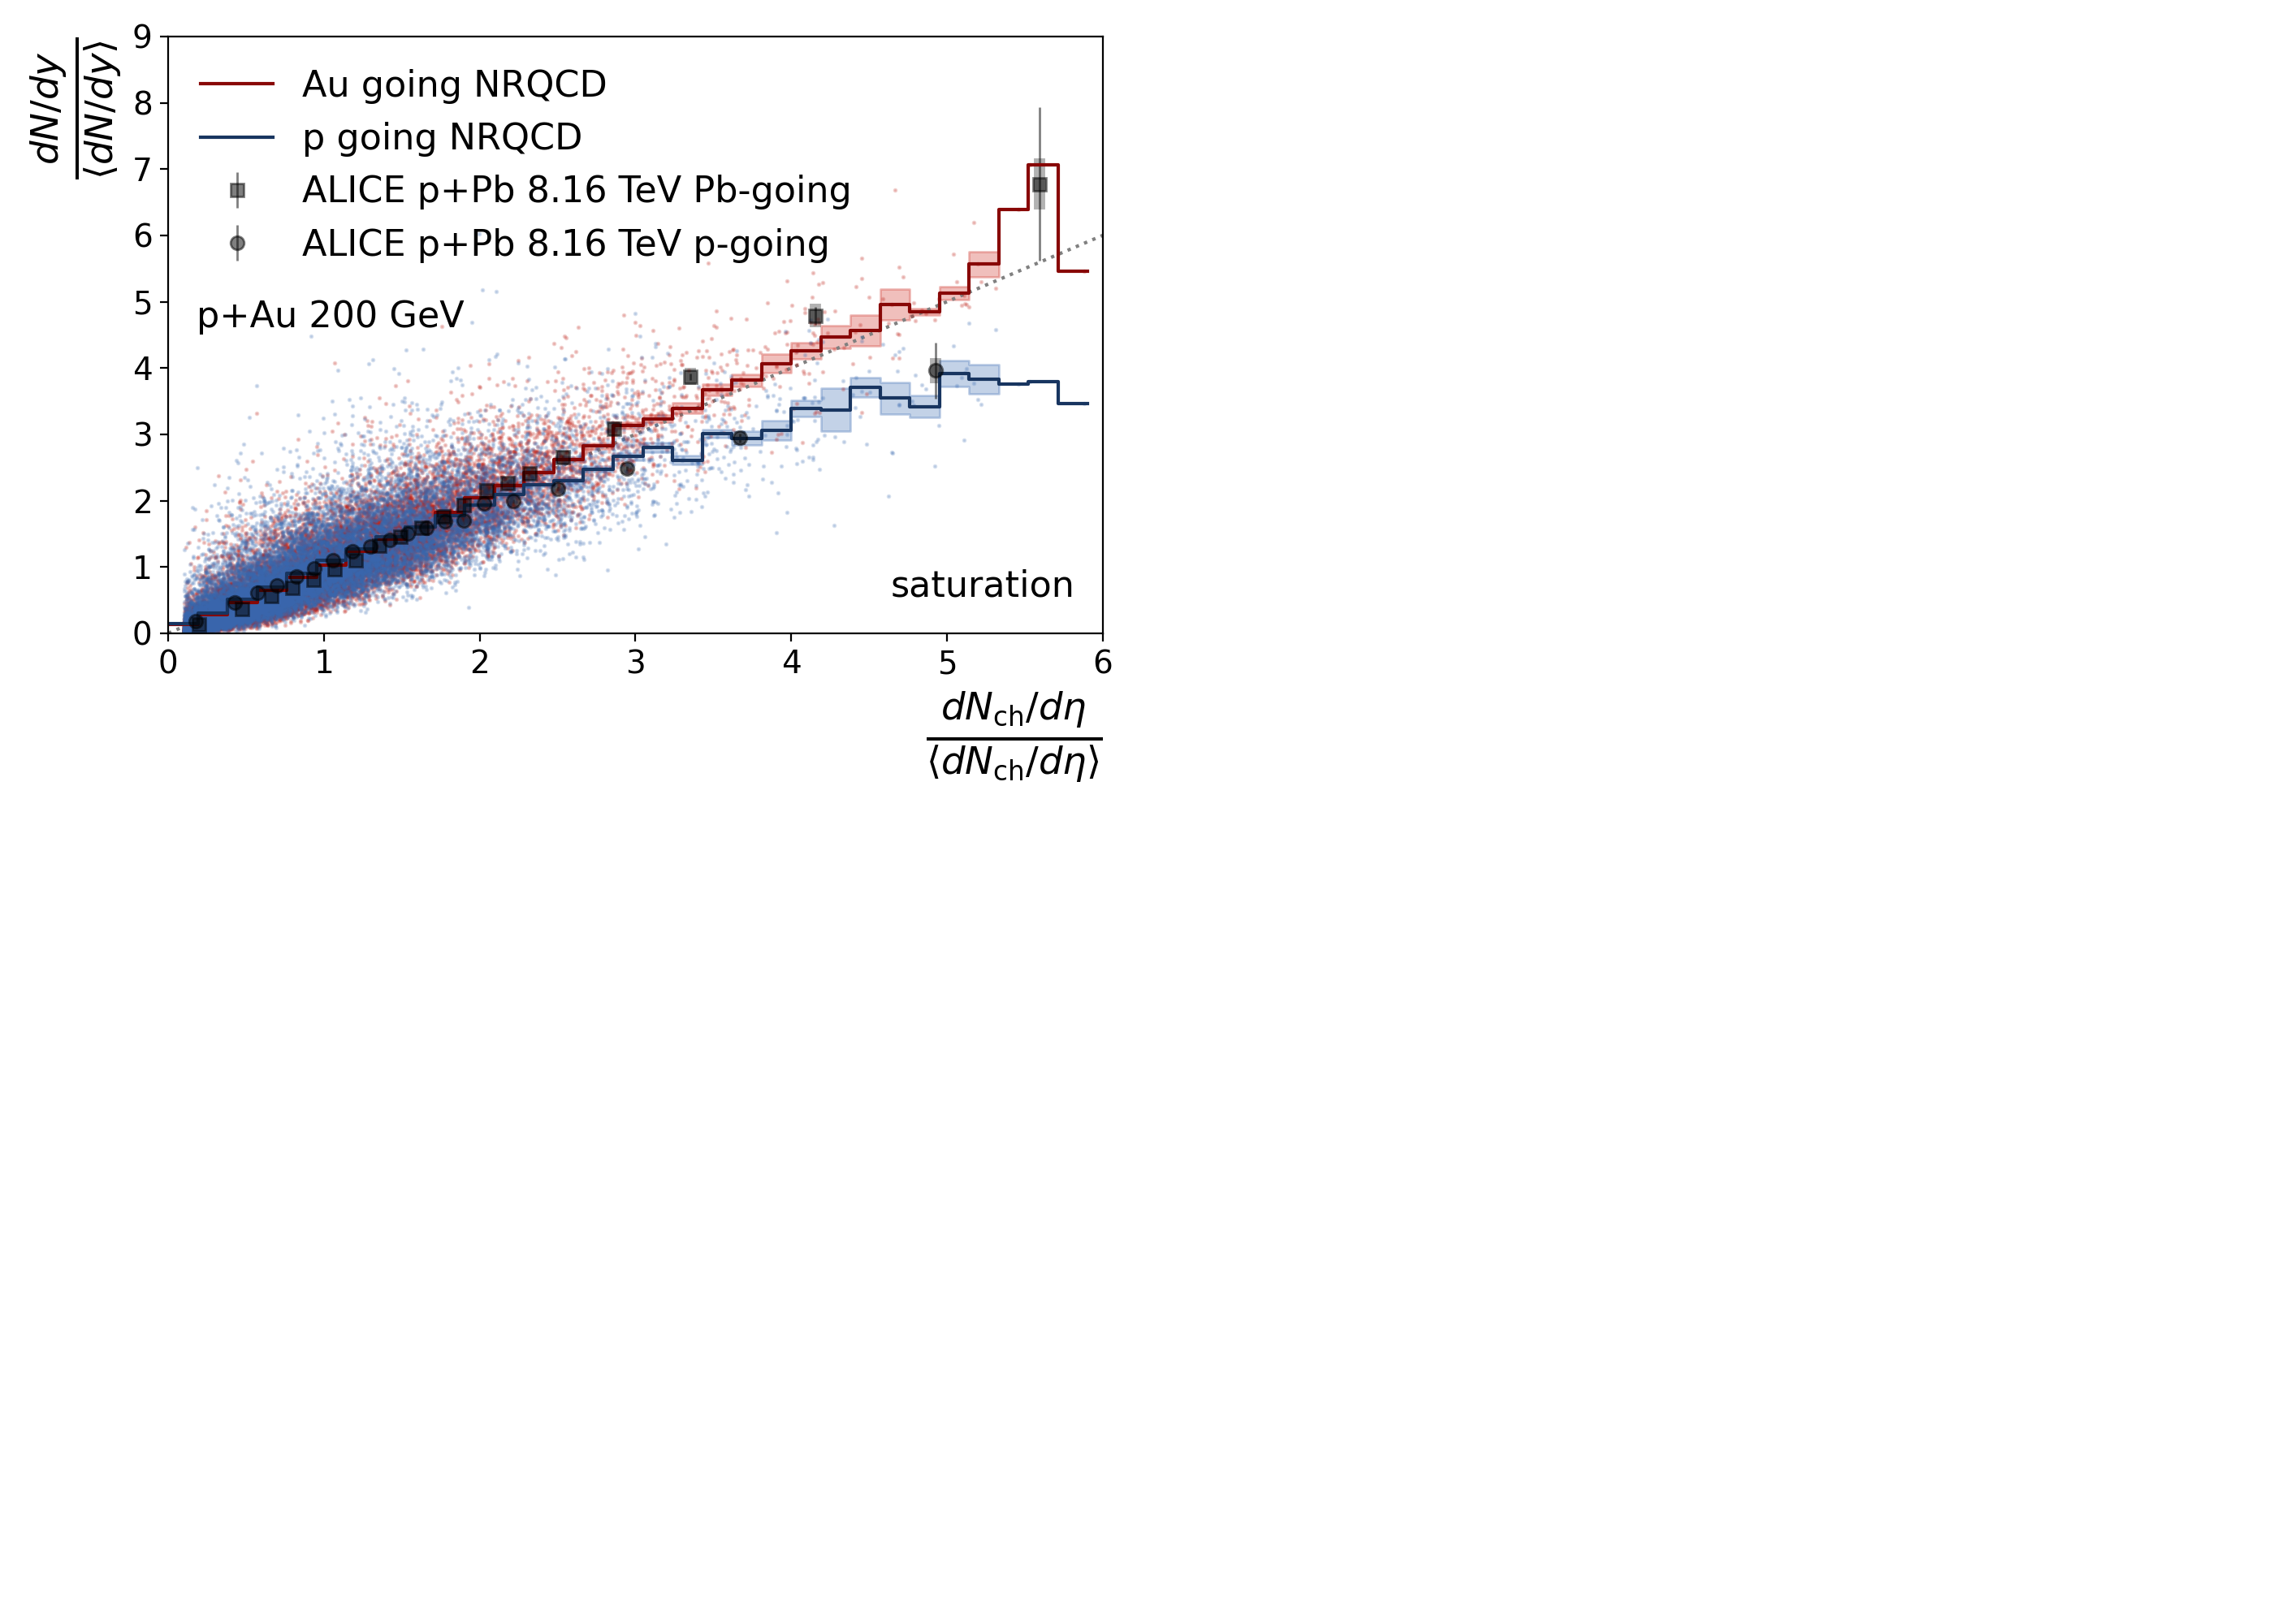

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [16]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,6)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data[:,0]/mean(data[:,0])
jpsip = data[:,2]/mean(data[:,2])
jpsiPb = data[:,4]/mean(data[:,4])

gluons2 = data3[:,0]/mean(data3[:,0])
jpsip2 = data3[:,2]/mean(data3[:,2])
jpsiPb2 = data3[:,4]/mean(data3[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

ax.plot(data3[:,0]/mean(data3[:,0]), data3[:,4]/mean(data3[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
ax.plot(data3[:,0]/mean(data3[:,0]), data3[:,2]/mean(data3[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)



ax.step(bins, bin_meansb2, alpha=1, color='#880706', label=r'Au going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_meansb, alpha=1, color='#183560', label=r'p going NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='#396AB1')


ax.text(left, bottom+0.45, 'p+Au 200 GeV',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)


ax.text(right, bottom, 'saturation',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC-y-1.8.pdf')


<IPython.core.display.Javascript object>


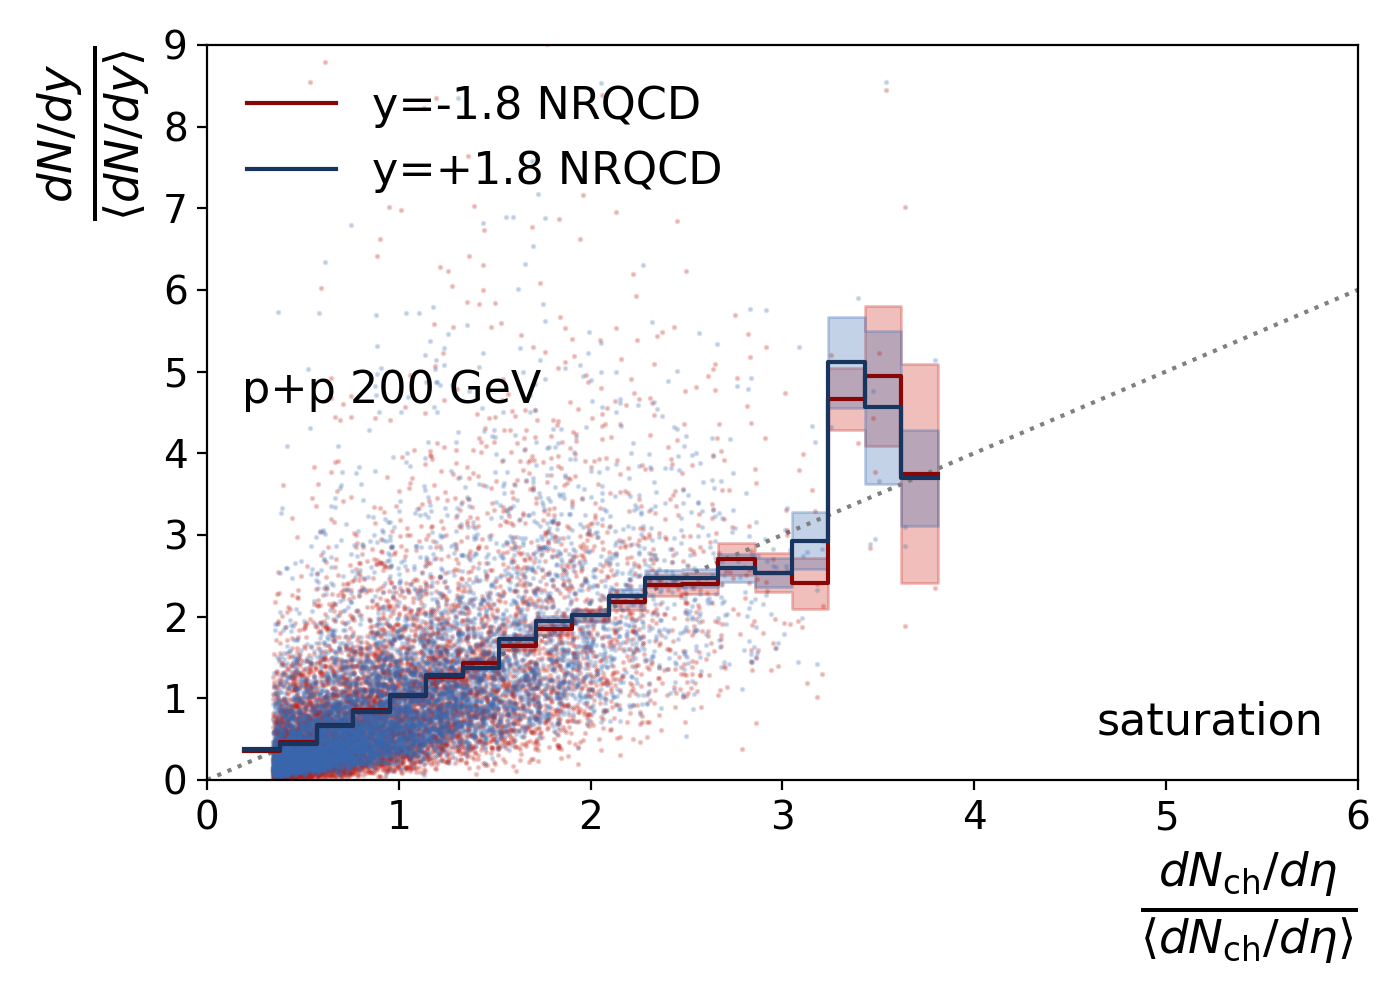

/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/schenke/projects/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice.
/Users/schenke/projects/yt-conda/l

In [13]:
left = .03
bottom = .05
right = 0.97
top = 0.95

fig2c = plt.figure()
fig2c.set_size_inches(7,5)
ax = plt.axes()
ax.set_ylim(0,9)
ax.set_xlim(0,6)
#ax.hist(data[:,0], log=True)

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_p-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEp=data_temp[:,:]

with open("/Users/schenke/projects/pAJPsi/JPsi/plots/data/ALICE_Pb-going_8160GeV_2004.12673.dat","r") as f:
    data_temp = genfromtxt(f)    
    dataALICEPb=data_temp[:,:]


gluons = data[:,0]/mean(data[:,0])
jpsip = data[:,2]/mean(data[:,2])
jpsiPb = data[:,4]/mean(data[:,4])

gluons2 = datapp[:,0]/mean(datapp[:,0])
jpsip2 = datapp[:,2]/mean(datapp[:,2])
jpsiPb2 = datapp[:,4]/mean(datapp[:,4])

gluons3 = data3[:,0]/mean(data3[:,0])
jpsip3 = data3[:,2]/mean(data3[:,2])
jpsiPb3 = data3[:,4]/mean(data3[:,4])

ax.set_xlabel(r'$\frac{dN_{\rm ch}/d\eta}{\langle dN_{\rm ch}/d\eta\rangle}$', fontsize = 24, loc='right')
ax.set_ylabel(r'$\frac{dN/dy}{\langle dN/dy \rangle}$', fontsize = 24, loc='top')

nbin=64
bins = linspace(0, 12, nbin)
digitized = digitize(gluons, bins)
bin_means = [(jpsip[digitized == i]).mean() for i in range(0, len(bins))]
bin_error = [(jpsip[digitized == i]).var() for i in range(0, len(bins))]
bin_means2 = [(jpsiPb[digitized == i]).mean() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedb = digitize(gluons2, bins)
bin_meansb = [(jpsip2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb = [(jpsip2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_meansb2 = [(jpsiPb2[digitizedb == i]).mean() for i in range(0, len(bins))]
bin_errorb2 = [(jpsiPb2[digitizedb == i]).var() for i in range(0, len(bins))]
bin_error2 = [(jpsiPb[digitized == i]).var() for i in range(0, len(bins))]
digitizedc = digitize(gluons3, bins)
bin_meansc = [(jpsip3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc = [(jpsip3[digitizedc == i]).var() for i in range(0, len(bins))]
bin_meansc2 = [(jpsiPb3[digitizedc == i]).mean() for i in range(0, len(bins))]
bin_errorc2 = [(jpsiPb3[digitizedc == i]).var() for i in range(0, len(bins))]
x = np.linspace(0,10,100)

shape = np.shape(bincount(digitized))
bin_means_count = np.zeros(nbin)
bin_means_count[:shape[0]] = bincount(digitized)
bin_error=sqrt(bin_error)/sqrt(bin_means_count)
bin_error2=sqrt(bin_error2)/sqrt(bin_means_count)

shapeb = np.shape(bincount(digitizedb))
bin_means_countb = np.zeros(nbin)
bin_means_countb[:shapeb[0]] = bincount(digitizedb)
bin_errorb=sqrt(bin_errorb)/sqrt(bin_means_countb)
bin_errorb2=sqrt(bin_errorb2)/sqrt(bin_means_countb)

shapec = np.shape(bincount(digitizedc))
bin_means_countc = np.zeros(nbin)
bin_means_countc[:shapec[0]] = bincount(digitizedc)
bin_errorc=sqrt(bin_errorc)/sqrt(bin_means_countc)
bin_errorc2=sqrt(bin_errorc2)/sqrt(bin_means_countc)

plotbins = bins+(bins[1]-bins[0])/2.
ax.plot(x, x, '-r', color='gray', label='', linestyle=":")

ax.plot(datapp[:,0]/mean(datapp[:,0]), datapp[:,4]/mean(datapp[:,4]),'o',rasterized=True, markersize=1, alpha=0.2, color='#BD1B12')
ax.plot(datapp[:,0]/mean(datapp[:,0]), datapp[:,2]/mean(datapp[:,2]),'o',rasterized=True, markersize=1, alpha=0.2, color='#396AB1')


# ax.scatter(data[:,0]/mean(data[:,0]), data[:,4]/mean(data[:,4]), alpha=0.2, c='#BD1B12', label=r'',marker='o',s=6, edgecolors='none')
# ax.scatter(data[:,0]/mean(data[:,0]), data[:,2]/mean(data[:,2]), alpha=0.2, c='#396AB1', label=r'',marker='s',s=6, edgecolors='none')

# ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV Pb-going',marker='s', linestyle='', linewidth=1)
# ax.errorbar(dataALICEPb[:,0], dataALICEPb[:,3], yerr=dataALICEPb[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)

# ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,4], alpha=0.5, color='black', label=r'ALICE p+Pb 8.16 TeV p-going',marker='o', linestyle='', linewidth=1)
# ax.errorbar(dataALICEp[:,0], dataALICEp[:,3], yerr=dataALICEp[:,6], alpha=0.3, color='black', label=r'',marker='', linestyle='', linewidth=5)



ax.step(bins, bin_meansb2, alpha=1, color='#880706', label=r'y=-1.8 NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means2, yerr=bin_error2, alpha=0.8, color='r', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb2-bin_errorb2, bin_meansb2+bin_errorb2, step='pre', alpha=0.3, color='#CE2C23')
ax.step(bins, bin_meansb, alpha=1, color='#183560', label=r'y=+1.8 NRQCD',marker='', where='pre')
#ax.errorbar(bins, bin_means, yerr=bin_error, alpha=0.8, color='#396AB1', label=r'',marker='', linestyle='')
ax.fill_between(bins, bin_meansb-bin_errorb, bin_meansb+bin_errorb, step='pre', alpha=0.3, color='#396AB1')


ax.text(left, bottom+0.45, 'p+p 200 GeV',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)


ax.text(right, bottom, 'saturation',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes, fontsize = 16)

ax.tick_params(axis='both', labelsize=14)

ax.legend(loc=2, prop={'size': 16}, ncol=1, fontsize=16, frameon=False)
plt.tight_layout()
plt.savefig('/Users/schenke/projects/pAJPsi/JPsi/plots/correlator_scatter_RHIC-pp.pdf')
